In [1]:
# 1 Import the pandas module and the seaborn module.
import pandas as pd
import seaborn as sns

In [2]:
# 2 Read avocado.csv into a Pandas DataFrame and display the first five rows.
avocado_data = pd.read_csv('avocado.csv')
print(avocado_data.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [3]:
# 3 Display basic information about the DataFrame and its columns. Note the Date column has the object type.
print(avocado_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [4]:
# 4 Convert the Date column to the datetime type. Repeat #3.
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])
print(avocado_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB
None


In [5]:
# 5 Filter the data with query() so it contains just the rows for 2015, for the conventional type, and for the region named Albany. Store only the Date, Total Bags, and Small Bags columns in a new DataFrame. Display the first 5 rows.
filtered_data = avocado_data.query("year == 2015 and type == 'conventional' and region == 'Albany'")
filtered_data = filtered_data[['Date', 'Total Bags', 'Small Bags']]
print(filtered_data.head())


        Date  Total Bags  Small Bags
0 2015-12-27     8696.87     8603.62
1 2015-12-20     9505.56     9408.07
2 2015-12-13     8145.35     8042.21
3 2015-12-06     5811.16     5677.40
4 2015-11-29     6183.95     5986.26


In [6]:
# 6 Melt the data in the Total Bags and Small Bags columns, but not the values in the Date column, naming the column that contains the type of bag as Bags and the column that contains the number of bags as Count. Display the melted DF.
melted_data = pd.melt(filtered_data, id_vars=['Date'], value_vars=['Total Bags', 'Small Bags'], var_name='Bags', value_name='Count')
print(melted_data)

          Date        Bags     Count
0   2015-12-27  Total Bags   8696.87
1   2015-12-20  Total Bags   9505.56
2   2015-12-13  Total Bags   8145.35
3   2015-12-06  Total Bags   5811.16
4   2015-11-29  Total Bags   6183.95
..         ...         ...       ...
99  2015-02-01  Small Bags   9170.82
100 2015-01-25  Small Bags  10103.35
101 2015-01-18  Small Bags  11651.09
102 2015-01-11  Small Bags   8036.04
103 2015-01-04  Small Bags   9186.93

[104 rows x 3 columns]


<Axes: xlabel='Date', ylabel='Count'>

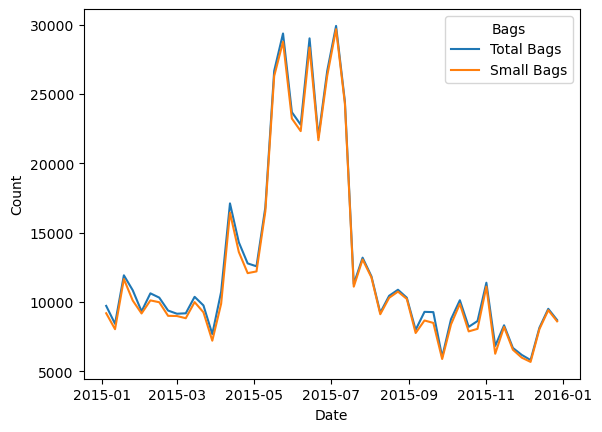

In [7]:
#7 Plot the melted data with a Seaborn line plot, using Date as x-axis, Count as y-axis, and Bags for the hue. 
sns.lineplot(x='Date', y='Count', hue='Bags', data=melted_data)

In [8]:
# 8 Bin the data in the Total Volume column into four quantiles labeled ‘Poor’, ‘Modest’, ‘Good’, and ‘Excellent’, and store the bin labels in a new column named Sales Volume. Display the first five rows of the modified DF.
avocado_data['Sales Volume'] = pd.qcut(avocado_data['Total Volume'], q=4, labels=['Poor', 'Modest', 'Good', 'Excellent'])
print(avocado_data.head())

   Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region Sales Volume  
0  2015  Albany       Modest  
1  2015  Albany       Mo

<Axes: xlabel='year', ylabel='count'>

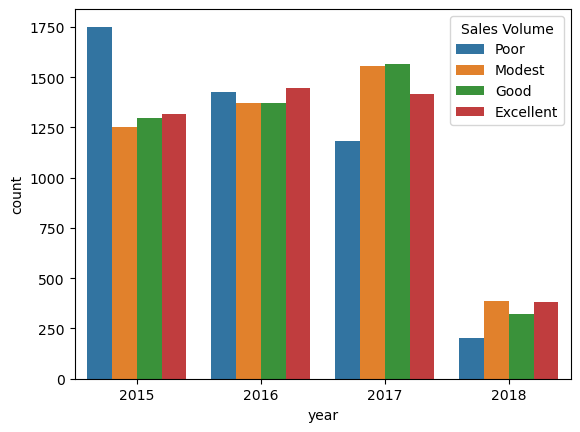

In [9]:
# 9 Plot the binned data by year with sns.countplot().
sns.countplot(x='year', hue='Sales Volume', data=avocado_data)

In [10]:
# 10 Melt the three bag size columns specifying var_name = Bags and value_name = Count. Display the melted DF.
melted_bag_data = pd.melt(avocado_data, id_vars=['Date', 'year'], value_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], var_name='Bags', value_name='Count')
print(melted_bag_data)


            Date  year         Bags    Count
0     2015-12-27  2015   Small Bags  8603.62
1     2015-12-20  2015   Small Bags  9408.07
2     2015-12-13  2015   Small Bags  8042.21
3     2015-12-06  2015   Small Bags  5677.40
4     2015-11-29  2015   Small Bags  5986.26
...          ...   ...          ...      ...
54742 2018-02-04  2018  XLarge Bags     0.00
54743 2018-01-28  2018  XLarge Bags     0.00
54744 2018-01-21  2018  XLarge Bags     0.00
54745 2018-01-14  2018  XLarge Bags     0.00
54746 2018-01-07  2018  XLarge Bags     0.00

[54747 rows x 4 columns]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


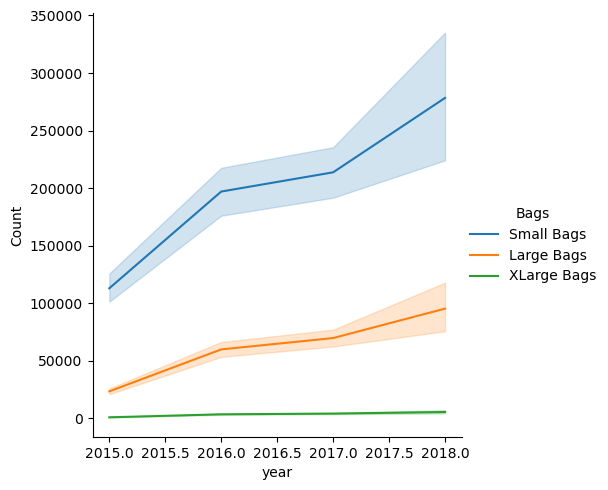

In [11]:
# 11 Plot the bags by year using sns.relpot() with kind = line, x = year, y = Count and hue = Bags
sns.relplot(kind='line', x='year', y='Count', hue='Bags', data=melted_bag_data)

In [12]:
# 12 In an H2 markdown cell, indicate which bag size sells best. 

## Small Bags sells best